
# Data Preprocessing

A key step in any machine learning project is data preprocessing, which prepares raw data for model training and evaluation. Proper preprocessing can significantly improve model performance and robustness, while poor preprocessing can lead to misleading results or even model failure.

A few common preprocessing tasks include:

1.  **Handling missing values**: Missing data can skew results or cause algorithms to fail. Common strategies of handling missing values include:
    -   Removing rows/columns with missing values
    -   Imputing missing values using mean, median, or mode
    -   Using advanced techniques like KNN imputation
2.  **Feature scaling**: Many algorithms are sensitive to the scale of input features. Common methods include:
    -   Standardization (z-score normalization): Rescales features to have mean 0 and standard deviation 1
    -   Min-Max scaling: Rescales features to a fixed range, typically [0, 1]
3.  **Encoding categorical variables**: Machine learning algorithms typically require numerical input. Common techniques include:
    -   One-hot encoding: Converts categorical variables into binary columns
    -   Label encoding: Assigns a unique integer to each category
4.  **Removing duplicates**: Duplicate rows can bias model training and evaluation.
5.  **Feature engineering**: Creating new features from existing ones can improve model performance. Examples include:
    -   Polynomial features
    -   Interaction terms
6.  **Pipeline creation**: Using pipelines to chain preprocessing steps and model fitting can simplify the workflow and ensure consistent preprocessing across training and testing data.

## Practical Demonstration

We will demonstrate data preprocessing using the `pandas` library for data manipulation and `scikit-learn` for machine learning tasks. The dataset we will use is the Titanic dataset, which contains information about passengers on the Titanic and whether they survived.

### Loading the data

-   Loading the Titanic Dataset

In [1]:
from sklearn.datasets import fetch_openml

# Load the Titanic dataset from scikit-learn
data = fetch_openml('titanic', version=1, as_frame=True)
print(data['DESCR'])

**Author**: Frank E. Harrell Jr., Thomas Cason  
**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  
**Please cite**:   

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variable

-   Convert the dataset to a pandas DataFrame and display the first few rows

In [2]:
df = data.frame
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB
None


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Exploratory Data Analysis (EDA)

We'll start by doing a bit of EDA to understand the dataset better. We begin by visualising the distribution of the target variable `survived`:

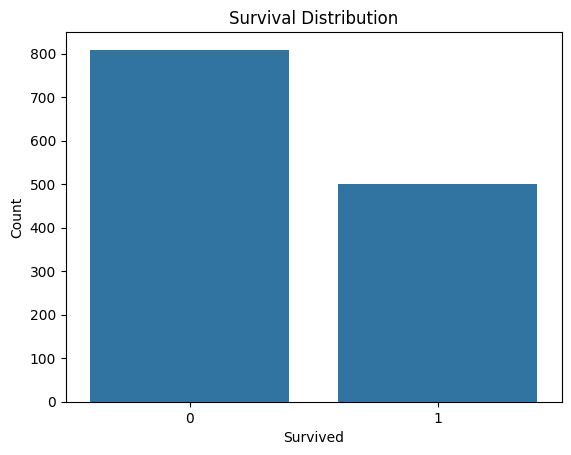

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

As a first guess, we might hypothesize that the survival rate is higher might depend on the socio-economic status, which we can infer from the `fare` column. Let's visualize the distribution of fare for survivors and non-survivors:

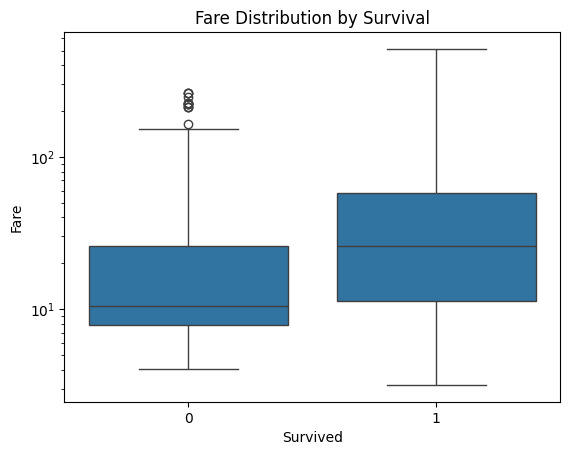

In [4]:
sns.boxplot(x='survived', y='fare', data=df, log_scale=True)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

This seems to be borne out by the data, as we can see that survivors tend to have higher fares than non-survivors. Another indication of socio-economic status is the passenger class, which we can visualize as follows:

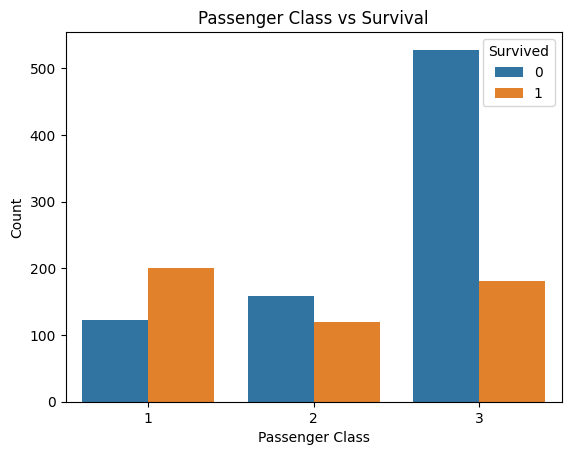

In [5]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Passenger Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Another hypothesis we might have is that the survival rate might depend on the gender of the passengers, e.g. "Women and children first". Let's visualize the distribution of survival by gender:

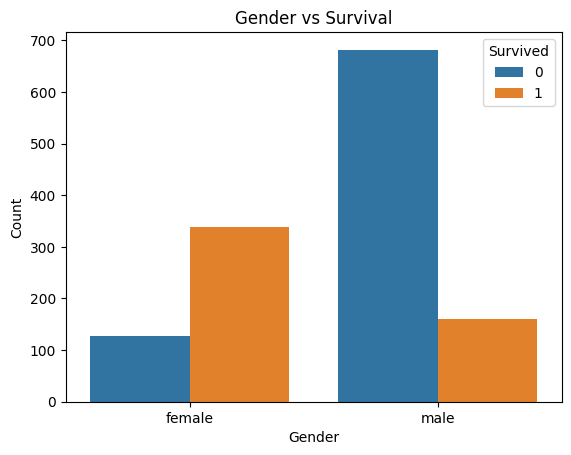

In [6]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Gender vs Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

We will only keep the features mentioned in the hypotheses above, which are `fare`, and `sex`. We will also keep the target variable `survived` for our model.

In [7]:
df = df[['fare', 'sex', 'survived']]
X = df.drop(columns=data.target.name)
y = df[data.target.name]

### Train-Test Split

Perform a train-test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Preprocessing Steps

#### Handling Missing Values

Missing values are common in real-world datasets. In the Titanic dataset, the `fare` column has some missing values. We will handle these missing values by imputing them with the mean fare.

First, let's check for missing values in the training and test sets:

In [9]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
df.info()

fare    1
sex     0
dtype: int64
fare    0
sex     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   fare      1308 non-null   float64 
 1   sex       1309 non-null   category
 2   survived  1309 non-null   category
dtypes: category(2), float64(1)
memory usage: 13.2 KB


We can see that the `fare` column has some (one) missing values. We will fill these missing values with the mean fare using the `SimpleImputer` class from `scikit-learn`.

In [10]:
# Fill missing values in the 'fare' column with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train[['fare']] = imputer.fit_transform(X_train[['fare']])
X_test[['fare']] = imputer.transform(X_test[['fare']])

#### Feature Scaling

Feature scaling is important for algorithms that are sensitive to the scale of input features, such as logistic regression, k-nearest neighbors, and support vector machines. We will scale the `fare` feature using standardization (z-score normalization), which rescales the feature to have mean 0 and standard deviation 1.

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train[['fare']] = scaler.fit_transform(X_train[['fare']])

# Transform the test data
X_test[['fare']] = scaler.transform(X_test[['fare']])

#### Encoding Categorical Variables

Categorical variables need to be converted into numerical format for machine learning algorithms. Depending on the type of categorical variable, i.e. whether it is ordinal or nominal, we can use different encoding techniques. For a nominal categorical variable, for which the categories do not have a natural order, we can use **one-hot encoding**. For an ordinal categorical variable, where the categories have a natural order, we can use **label encoding**.

In the reduced Titanic dataset, the only categorical variable is `sex`, which is a nominal variable with two categories, `male` and `female`. We will use one-hot encoding to convert this categorical variable into numerical format. One-hot encoding creates binary columns for each category, indicating the presence or absence of that category in each row.

In [12]:
X_train.head()

,fare,sex
772,-0.495582,male
543,-0.445269,male
289,0.890700,female
10,3.747624,male
147,0.171035,male


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
one_hot_encoder = OneHotEncoder(drop='first')

# Encode the 'sex' column
X_train_encoded = one_hot_encoder.fit_transform(X_train[['sex']]).toarray()
X_test_encoded = one_hot_encoder.transform(X_test[['sex']]).toarray()
# Create a DataFrame with the encoded columns
import pandas as pd
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['sex']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(['sex']))
# Concatenate the encoded columns with the original DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df], axis=1)

# Drop the original 'sex' column
X_train = X_train.drop(columns=['sex'])
X_test = X_test.drop(columns=['sex'])

We have now preprocessed the dataset, and it is ready for training a machine learning model. Here's how the preprocessed training data looks like:

In [14]:
X_train.head()

,fare,sex_female,sex_male
0,-0.495582,0.0,1.0
1,-0.445269,0.0,1.0
2,0.890700,1.0,0.0
3,3.747624,0.0,1.0
4,0.171035,0.0,1.0


We've only kept two features: `fare` (numerical) and `sex` (categorical). The target variable is `survived`, which we want to predict.

### Training a Machine Learning Model

Now that we have preprocessed the data, we can train a machine learning model. We are dealing with a binary classification problem (predicting survival), so we will use logistic regression as our model. Logistic regression is a simple yet effective algorithm for binary classification tasks, and we will discuss it in more detail in a later session.

In [15]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Evaluating the Model

After training the model, we need to evaluate its performance on the test data. We will use the accuracy metric, which measures the proportion of correct predictions made by the model.

In [16]:
# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.75


In [17]:
# Make predictions on the test data
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['did not survive', 'survived']))

Confusion Matrix:
[[121  23]
 [ 42  76]]

Classification Report:
                 precision    recall  f1-score   support

did not survive       0.74      0.84      0.79       144
       survived       0.77      0.64      0.70       118

       accuracy                           0.75       262
      macro avg       0.76      0.74      0.74       262
   weighted avg       0.75      0.75      0.75       262



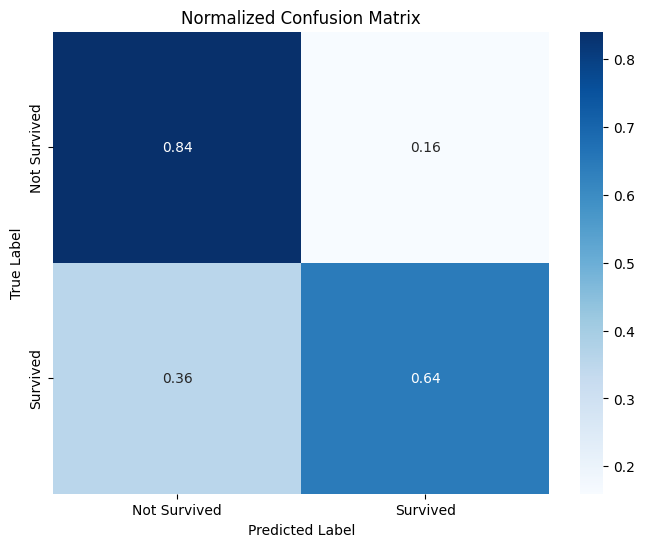

In [18]:
# Plot the normalized confusion matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Hands-on Exercises

In this hands-on exercise, you will apply the data preprocessing to the Iris dataset, with a twist: instead of considering the species as the target variable, you will consider the petal length as the target variable. The ultimate goal is to predict the petal length based on the other features (sepal length, sepal width, petal width, and species).

-   Load the Iris dataset

In [19]:
df = pd.read_csv('../../data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


-   Extract the features and target variable
    -   Features: sepal length, sepal width, petal width, species
    -   Target variable: petal length

In [20]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'species']]
y = df['petal length (cm)']

-   Perform a train-test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-   Preprocess the data:
    -   Handle missing values (if any)
    -   Scale the numerical features (sepal length, sepal width, petal width)
    -   Encode the categorical variable (species) using one-hot encoding
    -   Remove any unnecessary columns

In [22]:
# Scale the numerical features
scaler = StandardScaler()
X_train[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']] = scaler.fit_transform(X_train[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']])
X_test[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']] = scaler.transform(X_test[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']])

# Encode the categorical variable using one-hot encoding
one_hot_encoder = OneHotEncoder(drop='first')
X_train_encoded = one_hot_encoder.fit_transform(X_train[['species']]).toarray()
X_test_encoded = one_hot_encoder.transform(X_test[['species']]).toarray()

# Create DataFrames with the encoded columns
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['species']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(['species']))

# Concatenate the encoded columns with the original DataFrame
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded_df], axis=1)

df_train = X_train.copy()
df_train['petal length (cm)'] = y_train.reset_index(drop=True)
df_test = X_test.copy()
df_test['petal length (cm)'] = y_test.reset_index(drop=True)

# Drop the original 'species' column
X_train = X_train.drop(columns=['species'])
X_test = X_test.drop(columns=['species'])

-   Train a linear regression model to predict the petal length using the preprocessed data

Model accuracy: 0.97
Mean Squared Error: 0.09
R^2 Score: 0.97


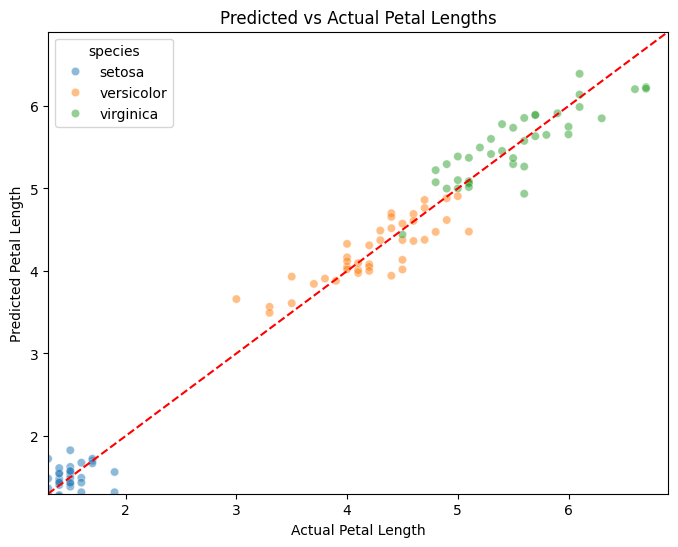

In [23]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')
# Make predictions on the test data
y_pred = model.predict(X_test)
df_test['predicted petal length (cm)'] = y_pred
df_train['predicted petal length (cm)'] = model.predict(X_train)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plot the predicted vs actual petal lengths, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='petal length (cm)', y='predicted petal length (cm)', hue='species', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Petal Lengths')
plt.xlabel('Actual Petal Length')
plt.ylabel('Predicted Petal Length')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()